In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('CallLog_20240525-203319.csv')

In [16]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,0:04:04
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,0:00:40
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,0:01:31
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,0:00:47
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,0:03:29
...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,0:00:55
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,0:02:33
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,0:00:58
2140,Voice,(705) 534-7770,NaN,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,0:01:11


In [17]:
df. isnull().sum()

Type                     0
Phone Number             1
Name                  1455
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Type                2142 non-null   object
 1   Phone Number        2141 non-null   object
 2   Name                687 non-null    object
 3   Date                2142 non-null   object
 4   Time                2142 non-null   object
 5   Action              2142 non-null   object
 6   Action Result       2142 non-null   object
 7   Result Description  292 non-null    object
 8   Duration            2142 non-null   object
dtypes: object(9)
memory usage: 150.7+ KB


In [19]:
df.describe(include='all')

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
count,2142,2141,687,2142,2142,2142,2142,292,2142
unique,1,794,188,7,621,2,10,6,382
top,Voice,(647) 774-8074,TORONTO ON,Wed 2024-05-22,12:21 PM,VoIP Call,Call connected,The caller hung up before the call was answered.,0:00:29
freq,2142,25,164,611,11,1793,1623,127,49


# DATA CLEANING

In [20]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

<ipython-input-20-1c351fde3544>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [21]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,0:04:04,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,0:00:40,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,0:01:31,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,0:00:47,2024-05-25 15:02:00
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,0:03:29,2024-05-25 13:44:00


In [23]:
#Convert 'Duration' to seconds, handle NaN values
dfDuration'] = pd.to_timedelta(df['Duration'], errors='coerce').dt.total_seconds()

In [24]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,(905) 655-6648,NaN,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,(705) 534-7770,NaN,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [26]:
#Handle missing values in 'Name' column
df['Name'].fillna('Unknown', inplace=True)

In [27]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,(647) 382-6778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,(416) 820-1716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,(647) 233-6658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,(905) 655-6648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,(289) 680-2441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,(647) 390-4940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,(705) 534-7770,Unknown,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [29]:
#Standardize phone number format (removing any unwanted characters)
df['Phone Number'] = df['Phone Number'].str.replace(r'\D', '', regex=True)

In [30]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,2896802441,HAMILTON ON,Sun 2024-05-19,2:16 PM,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,6473904940,TORONTO ON,Sun 2024-05-19,12:27 PM,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,6473904940,TORONTO ON,Sun 2024-05-19,12:22 PM,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,7055347770,Unknown,Sun 2024-05-19,9:07 AM,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [33]:
#Ensure 'Type', 'Action', and 'Action Result' are categorical df types
df['Type'] = df['Type'].astype('category')
df['Action'] = df['Action'].astype('category')
df['Action Result'] = df['Action Result'].astype('category')

In [34]:
df.isnull().sum()

Type                     0
Phone Number             1
Name                     0
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
Datetime                 0
dtype: int64

In [36]:
# Fill or drop remaining NaN values as necessary
df['Duration'].fillna(0, inplace=True)

In [38]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:47 PM,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,Sat 2024-05-25,3:34 PM,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,Sat 2024-05-25,3:25 PM,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,Sat 2024-05-25,3:02 PM,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,Sat 2024-05-25,1:44 PM,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00


In [40]:
#Split 'Datetime' back into 'Date' and 'Time' columns
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [41]:
df

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration,Datetime
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,NaN,244.0,2024-05-25 15:47:00
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,NaN,40.0,2024-05-25 15:34:00
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,NaN,91.0,2024-05-25 15:25:00
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,NaN,47.0,2024-05-25 15:02:00
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,NaN,209.0,2024-05-25 13:44:00
...,...,...,...,...,...,...,...,...,...,...
2137,Voice,2896802441,HAMILTON ON,2024-05-19,14:16:00,Phone Call,Accepted,The call connected to and was accepted by this...,55.0,2024-05-19 14:16:00
2138,Voice,6473904940,TORONTO ON,2024-05-19,12:27:00,VoIP Call,Call connected,NaN,153.0,2024-05-19 12:27:00
2139,Voice,6473904940,TORONTO ON,2024-05-19,12:22:00,Phone Call,Missed,NaN,58.0,2024-05-19 12:22:00
2140,Voice,7055347770,Unknown,2024-05-19,09:07:00,VoIP Call,Call connected,NaN,71.0,2024-05-19 09:07:00


In [43]:
# Drop the 'Datetime' column as it's no longer needed
df.drop(columns=['Datetime'], inplace=True)

In [47]:
#final inspection

print("Cleaned Data Head:\n", df.head())
print("Cleaned Data Info:\n", df.info())

Cleaned Data Head:
     Type Phone Number             Name        Date      Time      Action  \
0  Voice   4168201716  TORONTO      ON  2024-05-25  15:47:00   VoIP Call   
1  Voice   6473826778  TORONTO      ON  2024-05-25  15:34:00  Phone Call   
2  Voice   4168201716  TORONTO      ON  2024-05-25  15:25:00  Phone Call   
3  Voice   6472336658  TORONTO      ON  2024-05-25  15:02:00  Phone Call   
4  Voice   9056556648          Unknown  2024-05-25  13:44:00   VoIP Call   

    Action Result Result Description  Duration  
0  Call connected                NaN     244.0  
1          Missed                NaN      40.0  
2       Voicemail                NaN      91.0  
3          Missed                NaN      47.0  
4  Call connected                NaN     209.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Type              

In [49]:
# Basic statistics
print("Number of calls by type:\n", df['Type'].value_counts())
print("Number of calls by action result:\n", df['Action Result'].value_counts())

Number of calls by type:
 Type
Voice    2142
Name: count, dtype: int64
Number of calls by action result:
 Action Result
Call connected    1623
Missed             148
Hang Up            127
Accepted           122
Voicemail           76
Wrong Number        23
No Answer           11
Busy                 5
NotAllowed           4
Rejected             3
Name: count, dtype: int64


In [51]:
# Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Type                     0
Phone Number             1
Name                     0
Date                     0
Time                     0
Action                   0
Action Result            0
Result Description    1850
Duration                 0
dtype: int64


In [53]:
#Handle missing values in 'Result Description' column
df['Result Description'].fillna('No Description', inplace=True)

In [54]:
df.head()

,Type,Phone Number,Name,Date,Time,Action,Action Result,Result Description,Duration
0,Voice,4168201716,TORONTO ON,2024-05-25,15:47:00,VoIP Call,Call connected,No Description,244.0
1,Voice,6473826778,TORONTO ON,2024-05-25,15:34:00,Phone Call,Missed,No Description,40.0
2,Voice,4168201716,TORONTO ON,2024-05-25,15:25:00,Phone Call,Voicemail,No Description,91.0
3,Voice,6472336658,TORONTO ON,2024-05-25,15:02:00,Phone Call,Missed,No Description,47.0
4,Voice,9056556648,Unknown,2024-05-25,13:44:00,VoIP Call,Call connected,No Description,209.0


In [56]:
df.isnull().sum()

Type                  0
Phone Number          1
Name                  0
Date                  0
Time                  0
Action                0
Action Result         0
Result Description    0
Duration              0
dtype: int64

# VISUALIZATION PART

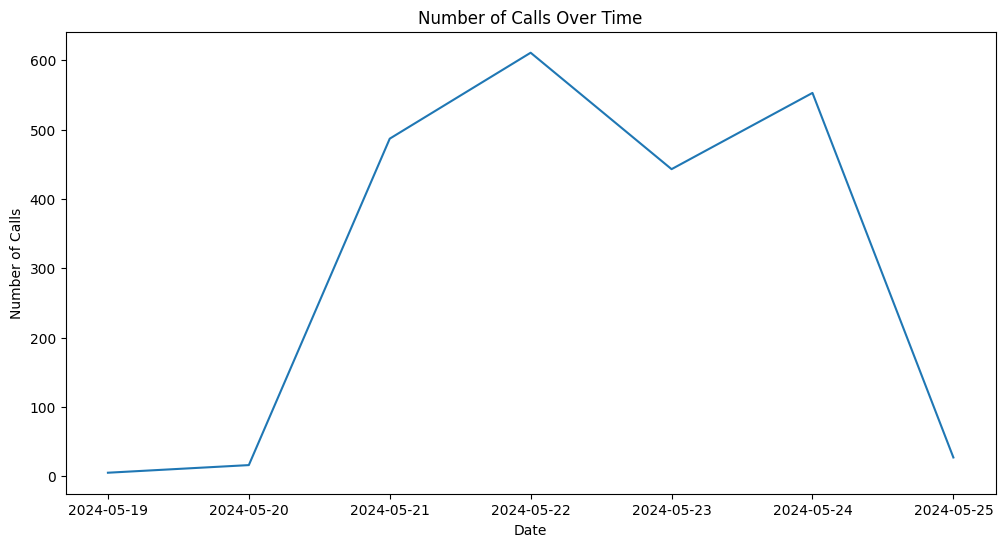

In [59]:
# Calls over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.groupby('Date').size().plot()
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

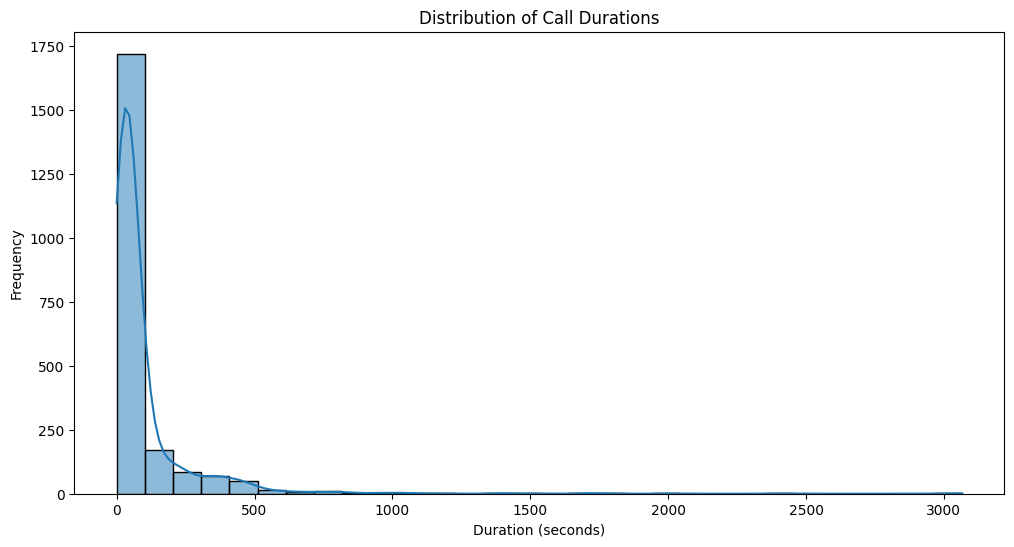

In [61]:
# Distribution of call durations
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Call Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

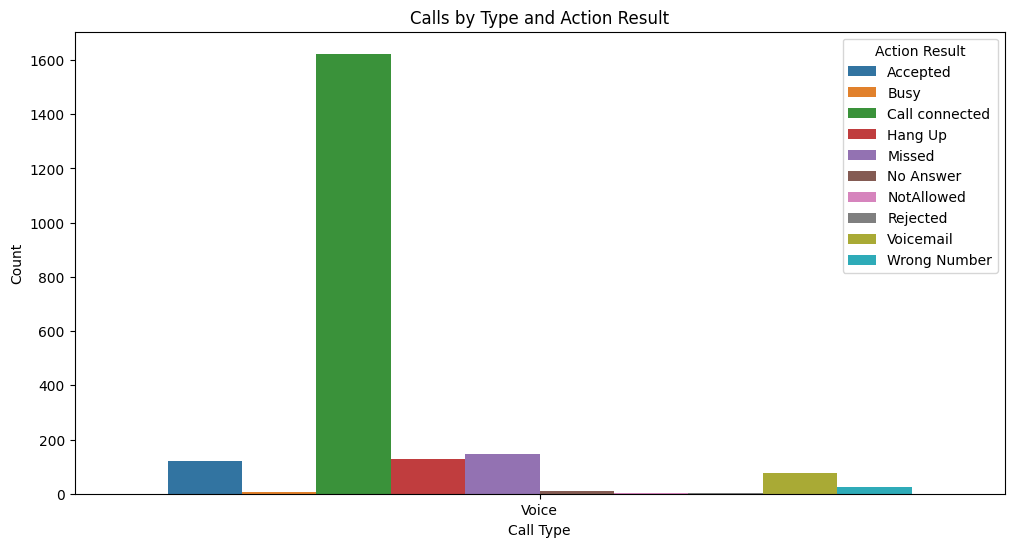

In [62]:
# Calls by type and action result
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Action Result', data=df)
plt.title('Calls by Type and Action Result')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.show()

<ipython-input-63-1d6cdb8a74ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


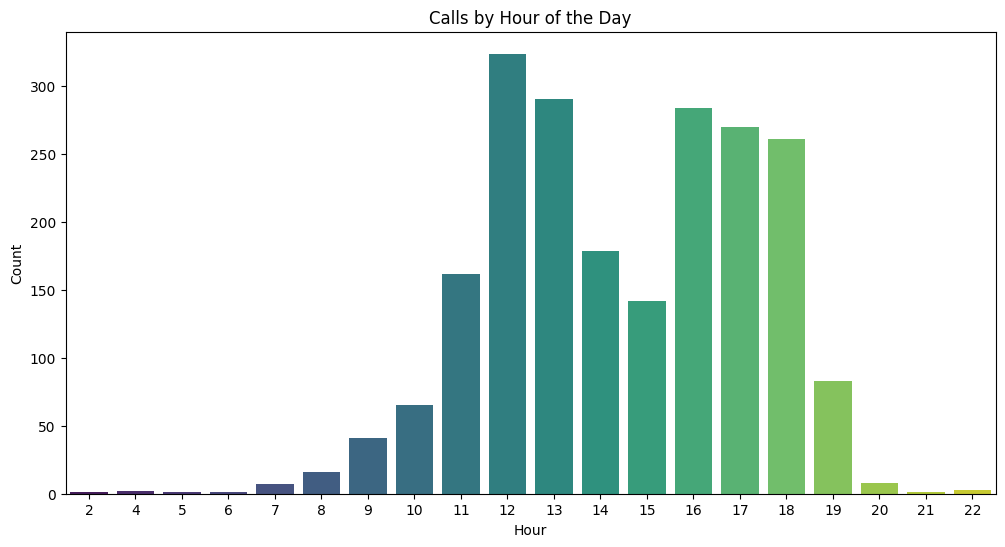

In [63]:
# Calls by hour of the day
plt.figure(figsize=(12, 6))
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Calls by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

<ipython-input-66-f7cd9c7f212c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


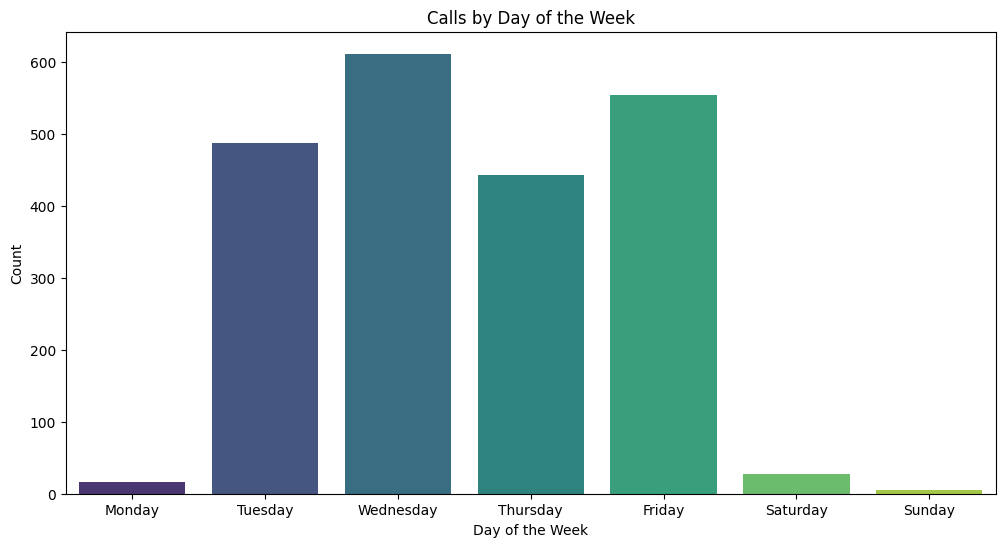

In [66]:
# Calls by day of the week
plt.figure(figsize=(12, 6))
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

<ipython-input-67-060817865f09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Name', data=df[df['Name'].isin(top_contacts)], order=top_contacts, palette='viridis')


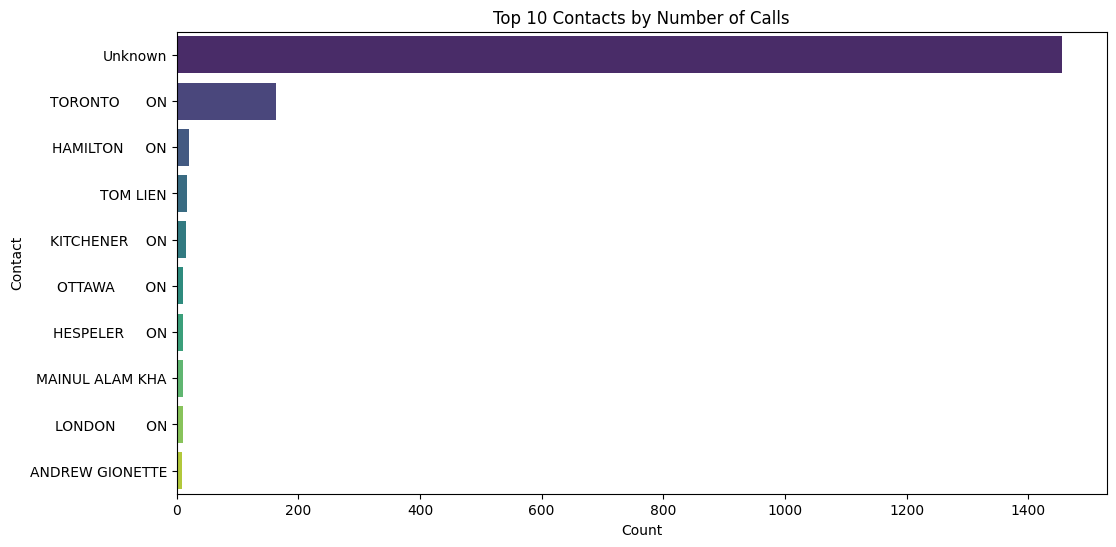

In [67]:
# Calls by contact
plt.figure(figsize=(12, 6))
top_contacts = df['Name'].value_counts().nlargest(10).index
sns.countplot(y='Name', data=df[df['Name'].isin(top_contacts)], order=top_contacts, palette='viridis')
plt.title('Top 10 Contacts by Number of Calls')
plt.xlabel('Count')
plt.ylabel('Contact')
plt.show()

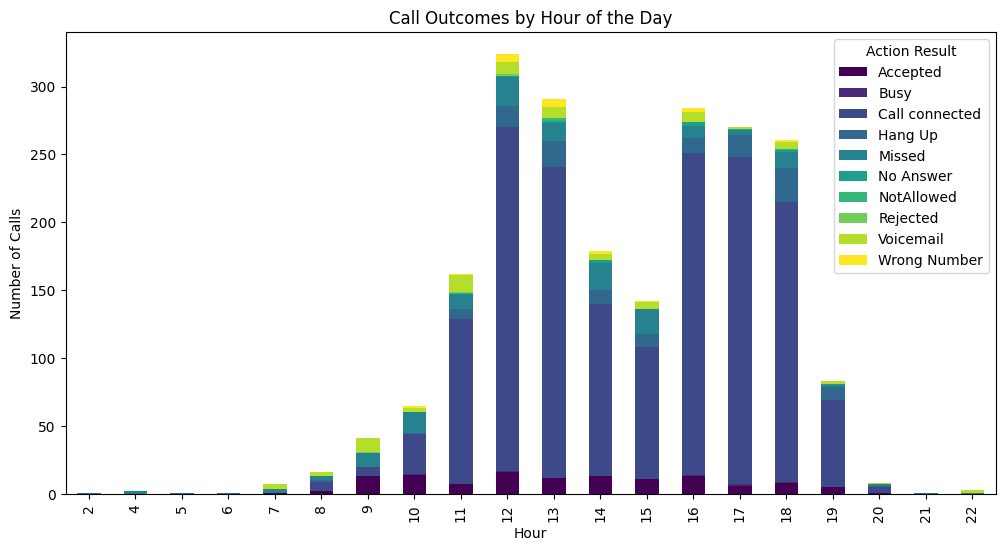

In [68]:
# Call Outcomes by Day and Time
plt.figure(figsize=(12, 6))
hourly_outcomes = df.groupby(['Hour', 'Action Result']).size().unstack().fillna(0)
hourly_outcomes.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Call Outcomes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

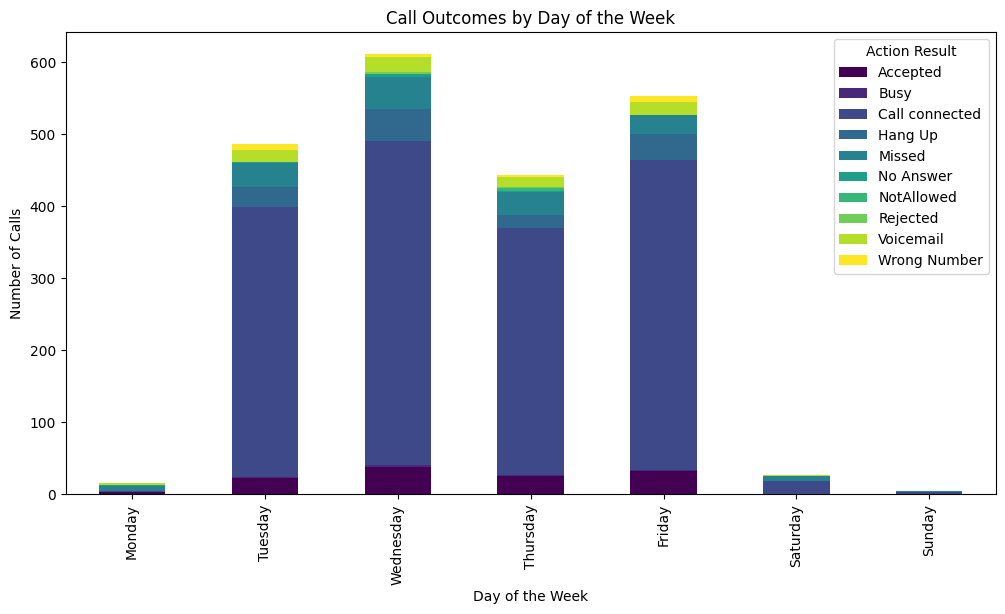

In [70]:
plt.figure(figsize=(12, 6))
daily_outcomes = df.groupby(['DayOfWeek', 'Action Result']).size().unstack().fillna(0)
daily_outcomes = daily_outcomes.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_outcomes.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Call Outcomes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()

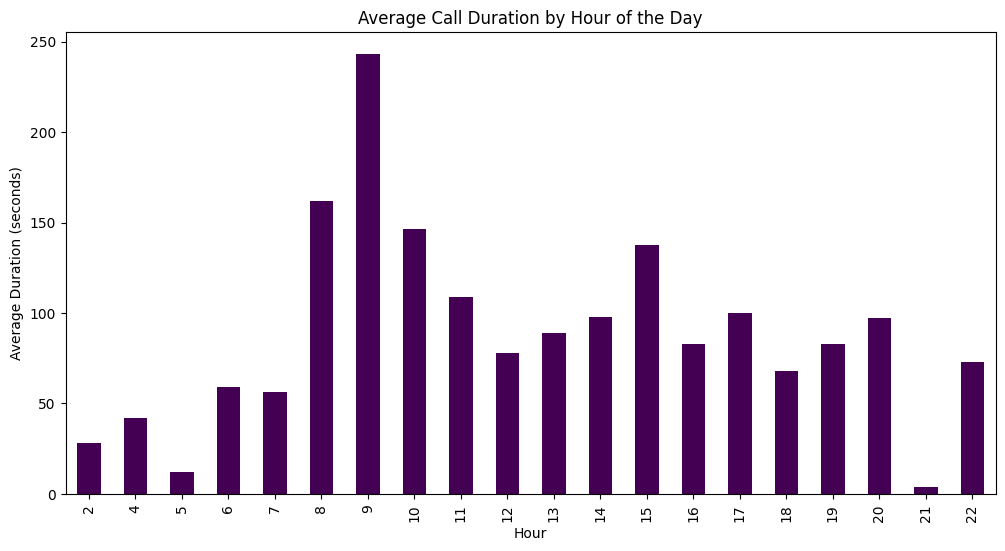

In [71]:
# Average Call Duration by Hour/Day
plt.figure(figsize=(12, 6))
avg_duration_hour = df.groupby('Hour')['Duration'].mean()
avg_duration_hour.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Call Duration by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Duration (seconds)')
plt.show()

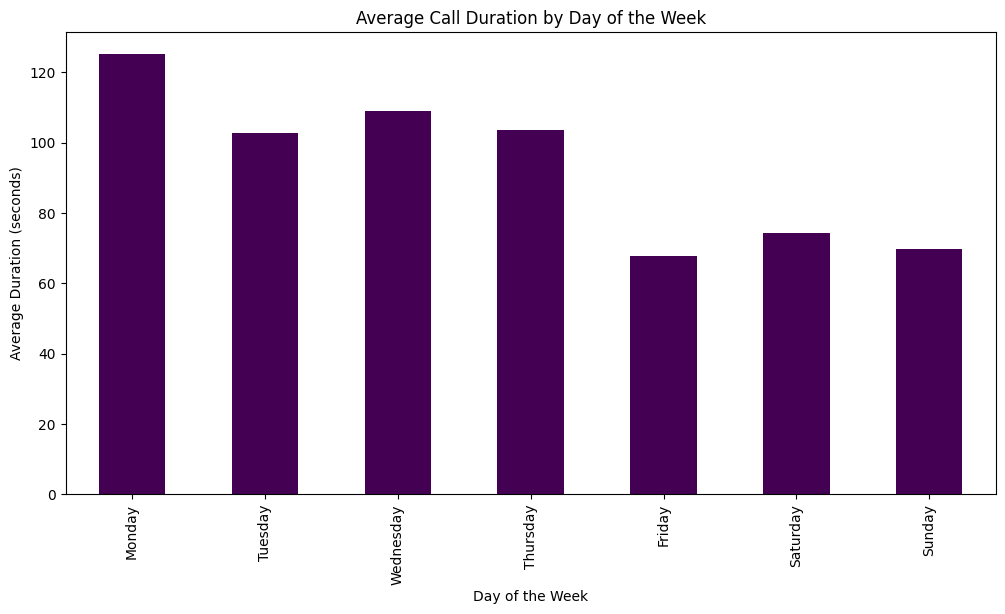

In [73]:
plt.figure(figsize=(12, 6))
avg_duration_day = df.groupby('DayOfWeek')['Duration'].mean()
avg_duration_day = avg_duration_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_duration_day.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Average Call Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (seconds)')
plt.show()

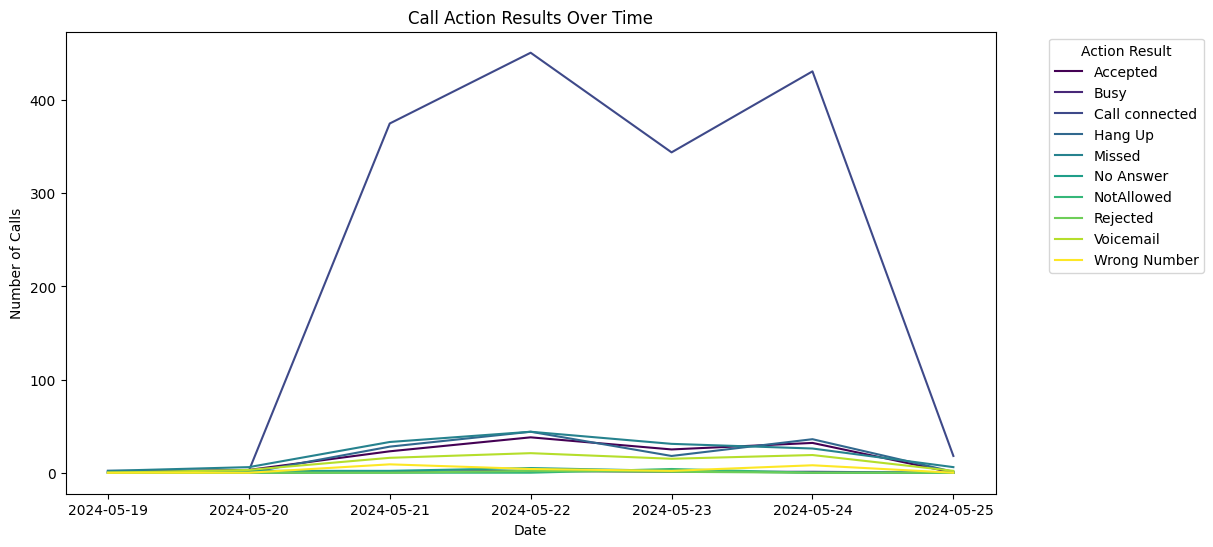

In [76]:
# Call Action Results Over Time
plt.figure(figsize=(12, 6))
call_outcomes_time = df.groupby(['Date', 'Action Result']).size().unstack().fillna(0)
call_outcomes_time.plot(kind='line', colormap='viridis', ax=plt.gca())
plt.title('Call Action Results Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(title='Action Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-75-3aec064666dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_contacts_duration, x=df[df['Name'].isin(top_contacts_duration)].groupby('Name')['Duration'].sum().sort_values(ascending=False), palette='viridis')


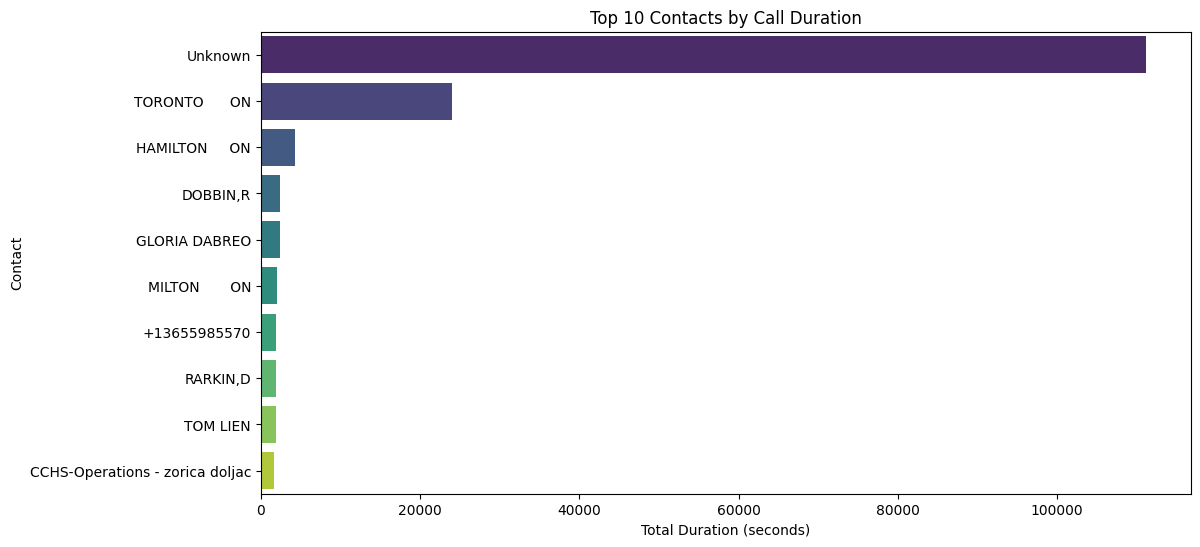

In [75]:
# Top 10 Contacts by Call Duration
plt.figure(figsize=(12, 6))
top_contacts_duration = df.groupby('Name')['Duration'].sum().nlargest(10).index
sns.barplot(y=top_contacts_duration, x=df[df['Name'].isin(top_contacts_duration)].groupby('Name')['Duration'].sum().sort_values(ascending=False), palette='viridis')
plt.title('Top 10 Contacts by Call Duration')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Contact')
plt.show()

In [78]:
# Identify peak call hours (for example, 9 AM to 6 PM)
peak_hours = df[(df['Hour'] >= 9) & (df['Hour'] <= 18)]


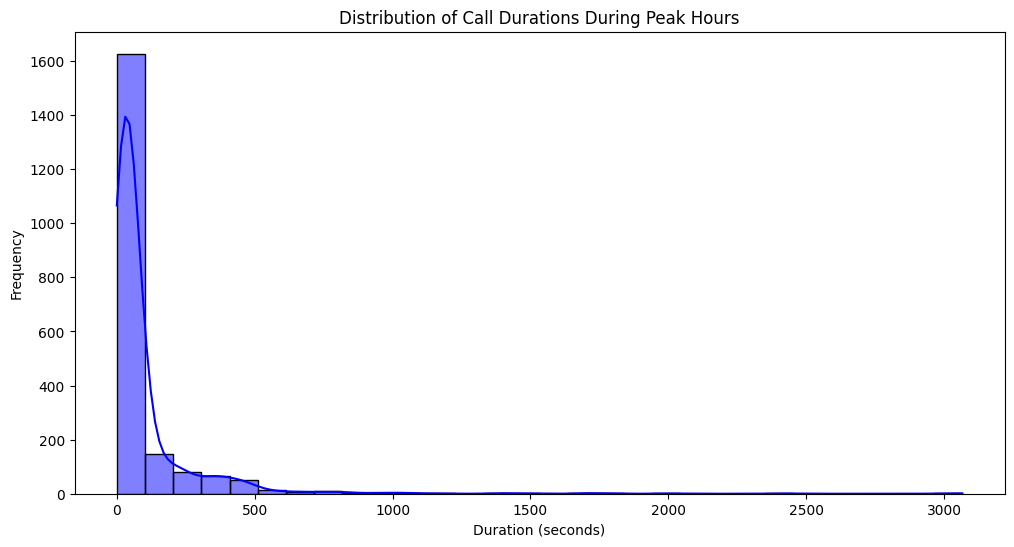

In [79]:
# Plot histogram of call durations during peak hours
plt.figure(figsize=(12, 6))
sns.histplot(peak_hours['Duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Call Durations During Peak Hours')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()